# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/Drive", force_remount=True)

base_path = "/content/Drive/MyDrive/NLP-Course/03-Text-Classification/"

Mounted at /content/Drive


# Text Classification Assessment

### Task #1: Perform imports and load the dataset into a pandas DataFrame

In [2]:
import pandas as pd

df = pd.read_csv(base_path + "moviereviews2.tsv", delimiter="\t")
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


### Task #2: Check for missing values:

In [3]:
df.isnull().sum()

label      0
review    20
dtype: int64

In [4]:
blanks = []

for index, label, review in df.itertuples():
    if type(review) == str:
        if review.isspace():
            blanks.append(index)

print(len(blanks), "blanks : ", blanks)

0 blanks :  []


### Task #3: Remove NaN values:

In [5]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

### Task #4: Take a quick look at the `label` column:

In [6]:
df['label'].value_counts()

neg    2990
pos    2990
Name: label, dtype: int64

### Task #5: Split the data into train & test sets:
You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.2, random_state=42`

In [7]:
from sklearn.model_selection import train_test_split

X = df["review"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4784,), (1196,))

### Task #6: Build a pipeline to vectorize the date, then train and fit a model
You may use whatever model you like. To compare your results to the solution notebook, use `LinearSVC`.

In [8]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

set_config(print_changed_only=False)

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                          ('clf', LinearSVC()),
])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

def classification_metrics(y_test, y_pred):
    # Calculating the Accuracy Score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy Score :", accuracy, "\n\n")

    # Classification Report
    print("Classification Report :\n")
    print(metrics.classification_report(y_test, y_pred), "\n\n")

    # Confusion Matrix
    conf_matx = metrics.confusion_matrix(y_test, y_pred)
    conf_matx_df = pd.DataFrame(conf_matx, index=["True neg", "True pos"], columns=["Predicted neg", "Predicted pos"])
    ## Using Heatmap plot to show the Confusion Matrix
    plt.figure(dpi=80)
    sns.heatmap(conf_matx_df, annot=True, fmt='.0f')
    plt.title("Confuion Matrix - Heatmap", fontdict={"fontsize": 12, "fontweight":"bold"})
    plt.show()

### Task #7: Run predictions and analyze the results

Accuracy Score : 0.919732441471572 


Classification Report :

              precision    recall  f1-score   support

         neg       0.94      0.90      0.92       596
         pos       0.90      0.94      0.92       600

    accuracy                           0.92      1196
   macro avg       0.92      0.92      0.92      1196
weighted avg       0.92      0.92      0.92      1196
 




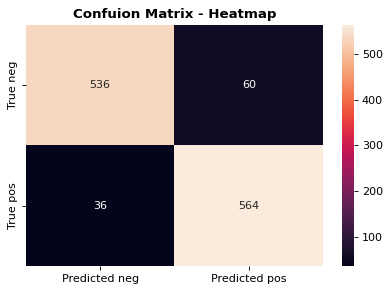

In [10]:
text_clf_lsvc.fit(X_train, y_train)

predictions = text_clf_lsvc.predict(X_test)

classification_metrics(y_test, predictions)